In [1]:
from __future__ import print_function

import tensorflow as tf
import numpy
import matplotlib.pyplot as plt
rng = numpy.random

In [2]:
# Parameters
learning_rate = 0.01
training_epochs = 1000
display_step = 50

In [3]:
train_X = numpy.asarray([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,
                         7.042,10.791,5.313,7.997,5.654,9.27,3.1])
train_Y = numpy.asarray([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,
                         2.827,3.465,1.65,2.904,2.42,2.94,1.3])
n_samples = train_X.shape[0]

In [4]:
X = tf.placeholder("float")
Y = tf.placeholder("float")

# Set model weights
W = tf.Variable(rng.randn(), name="weight")
b = tf.Variable(rng.randn(), name="bias")

# Construct a linear model
pred = tf.add(tf.multiply(X, W), b)

# Mean squared error
cost = tf.reduce_sum(tf.pow(pred-Y, 2))/(2*n_samples)

In [5]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

# Initialize the variables (i.e. assign their default value)
init = tf.global_variables_initializer()

Epoch: 0050 cost= 0.082177676 W= 0.290047 b= 0.510446
Epoch: 0100 cost= 0.081575662 W= 0.287641 b= 0.527755
Epoch: 0150 cost= 0.081043318 W= 0.285378 b= 0.544034
Epoch: 0200 cost= 0.080572613 W= 0.28325 b= 0.559345
Epoch: 0250 cost= 0.080156401 W= 0.281248 b= 0.573746
Epoch: 0300 cost= 0.079788387 W= 0.279365 b= 0.58729
Epoch: 0350 cost= 0.079462990 W= 0.277595 b= 0.600029
Epoch: 0400 cost= 0.079175323 W= 0.275929 b= 0.612011
Epoch: 0450 cost= 0.078921020 W= 0.274363 b= 0.623277
Epoch: 0500 cost= 0.078696191 W= 0.27289 b= 0.633874
Epoch: 0550 cost= 0.078497417 W= 0.271505 b= 0.643841
Epoch: 0600 cost= 0.078321710 W= 0.270201 b= 0.653216
Epoch: 0650 cost= 0.078166395 W= 0.268976 b= 0.662033
Epoch: 0700 cost= 0.078029118 W= 0.267823 b= 0.670325
Epoch: 0750 cost= 0.077907763 W= 0.266739 b= 0.678124
Epoch: 0800 cost= 0.077800505 W= 0.265719 b= 0.685459
Epoch: 0850 cost= 0.077705689 W= 0.26476 b= 0.692359
Epoch: 0900 cost= 0.077621914 W= 0.263858 b= 0.698848
Epoch: 0950 cost= 0.077547878 W=

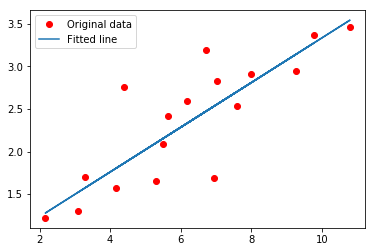

In [10]:
# Start training
with tf.Session() as sess:

    # Run the initializer
    sess.run(init)

    # Fit all training data
    for epoch in range(training_epochs):
        for (x, y) in zip(train_X, train_Y):
            sess.run(optimizer, feed_dict={X: x, Y: y})

        # Display logs per epoch step
        if (epoch+1) % display_step == 0:
            c = sess.run(cost, feed_dict={X: train_X, Y:train_Y})
            print("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(c), \
                "W=", sess.run(W), "b=", sess.run(b))

    print("Optimization Finished!")
    training_cost = sess.run(cost, feed_dict={X: train_X, Y: train_Y})
    print("Training cost=", training_cost, "W=", sess.run(W), "b=", sess.run(b), '\n')
    
    print("Optimization Finished!")
    training_cost = sess.run(cost, feed_dict={X: train_X, Y: train_Y})
    print("Training cost=", training_cost, "W=", sess.run(W), "b=", sess.run(b), '\n')

    # Graphic display
    plt.plot(train_X, train_Y, 'ro', label='Original data')
    plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Fitted line')
    plt.legend()
    plt.show()